In [25]:
#Import packages
import datetime
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [26]:
#read in data
data = pd.read_csv('submissions.csv',error_bad_lines=False)

Skipping line 67827: expected 13 fields, saw 16
Skipping line 67828: expected 13 fields, saw 16
Skipping line 67829: expected 13 fields, saw 16
Skipping line 67830: expected 13 fields, saw 16
Skipping line 67831: expected 13 fields, saw 14



In [27]:
list(data.columns)

['#image_id',
 'unixtime',
 'rawtime',
 'title',
 'total_votes',
 'reddit_id',
 'number_of_upvotes',
 'subreddit',
 'number_of_downvotes',
 'localtime',
 'score',
 'number_of_comments',
 'username']

In [28]:
data.head(10)

,#image_id,unixtime,rawtime,title,total_votes,reddit_id,number_of_upvotes,subreddit,number_of_downvotes,localtime,score,number_of_comments,username
0,0,1333172439,2012-03-31T12:40:39.590113-07:00,And here's a downvote.,63470,rmqjs,32657,funny,30813,1333197639,1844,622,Animates_Everything
1,0,1333178161,2012-03-31T14:16:01.093638-07:00,Expectation,35,rmun4,29,GifSound,6,1333203361,23,3,Gangsta_Raper
2,0,1333199913,2012-03-31T20:18:33.192906-07:00,Downvote,41,rna86,32,GifSound,9,1333225113,23,0,Gangsta_Raper
3,0,1333252330,2012-04-01T10:52:10-07:00,Every time I downvote something,10,ro7e4,6,GifSound,4,1333277530,2,0,Gangsta_Raper
4,0,1333272954,2012-04-01T16:35:54.393381-07:00,Downvote &quot;Dies Irae&quot;,65,rooof,57,GifSound,8,1333298154,49,0,Gangsta_Raper
5,0,1333761060,2012-04-07T08:11:00-07:00,"Demolished, every time you downvote someone",40,rxwjg,17,gifs,23,1333786260,-6,3,Hellothereawesome
6,0,1335503834,2012-04-27T12:17:14.103167-07:00,how i feel whenever i submit here,104,svpq7,67,fffffffuuuuuuuuuuuu,37,1335529034,30,12,NaN
7,0,1339160075,2012-06-08T19:54:35.421944-07:00,getting that first downvote on a new post,13,usmxn,5,funny,8,1339185275,-3,0,NaN
8,0,1339407879,2012-06-11T16:44:39.947798-07:00,How reddit seems to reacts whenever I share a ...,14,uwzrd,6,funny,8,1339433079,-2,0,NaN
9,0,1339425291,2012-06-11T21:34:51.692933-07:00,Every LastAirBender post with a NSFW tag,20,uxf5q,9,pics,11,1339450491,-2,0,HadManySons


In [29]:
data.describe()

,#image_id,unixtime,total_votes,number_of_upvotes,number_of_downvotes,localtime,score,number_of_comments
count,132302.000000,1.323020e+05,132302.000000,132302.000000,132302.000000,1.323020e+05,132302.000000,132302.000000
mean,10260.222151,1.340019e+09,1883.245748,1058.182900,825.062849,1.340036e+09,233.120051,39.063400
std,7317.385563,1.294615e+07,5970.693071,3181.146483,2796.540029,1.294027e+07,481.126196,142.742878
min,0.000000,1.217219e+09,0.000000,0.000000,0.000000,1.217244e+09,-264.000000,-1.000000
25%,3807.000000,1.333785e+09,15.000000,8.000000,6.000000,1.333811e+09,2.000000,0.000000
50%,9040.500000,1.344574e+09,45.000000,30.000000,14.000000,1.344599e+09,16.000000,3.000000
75%,16021.000000,1.348950e+09,376.000000,276.000000,96.000000,1.348952e+09,169.000000,15.000000
max,25887.000000,1.359095e+09,177103.000000,90396.000000,86707.000000,1.359095e+09,20570.000000,8357.000000


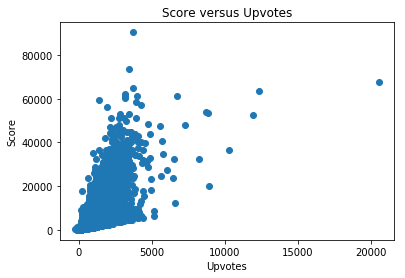

In [30]:
fig = plt.figure()
plot1 = fig.add_subplot(1,1,1)
plot1.scatter(data['score'],data['number_of_upvotes'])
plt.title('Score versus Upvotes')
plt.xlabel('Upvotes')
plt.ylabel('Score')
plt.show()

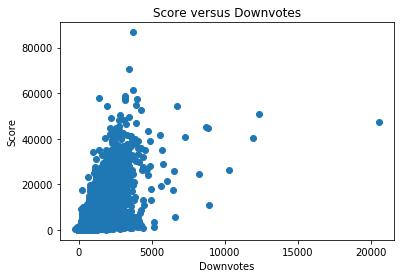

In [18]:
fig = plt.figure()
plot2 = fig.add_subplot(1,1,1)
plot2.scatter(data['score'],data['number_of_downvotes'])
plt.title('Score versus Downvotes')
plt.xlabel('Downvotes')
plt.ylabel('Score')
plt.show()

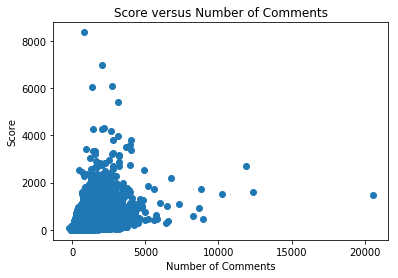

In [19]:
fig = plt.figure()
plot3 = fig.add_subplot(1,1,1)
plot3.scatter(data['score'],data['number_of_comments'])
plt.title('Score versus Number of Comments')
plt.xlabel('Number of Comments')
plt.ylabel('Score')
plt.show()

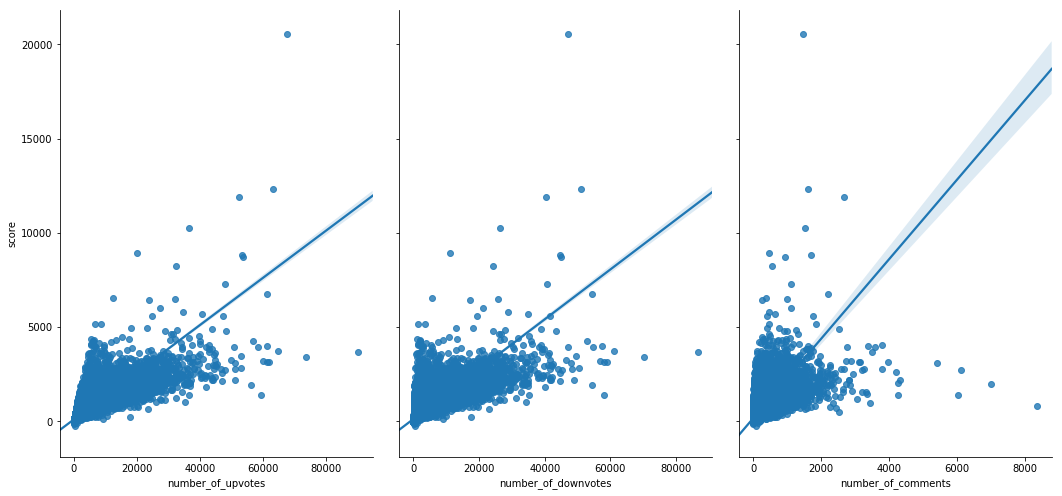

In [22]:
import seaborn
seaborn.pairplot(data, x_vars=['number_of_upvotes','number_of_downvotes','number_of_comments'], y_vars='score', size=7, aspect=0.7, kind='reg')

In [31]:
data.shape

(132302, 13)

In [54]:
score_feature = []
score = list(data['score'])
for s in score:
    score_feature.append([s])
score_feature

[[1844],
 [23],
 [23],
 [2],
 [49],
 [-6],
 [30],
 [-3],
 [-2],
 [-2],
 [-1],
 [149],
 [730],
 [7],
 [-5],
 [4],
 [-5],
 [-2],
 [0],
 [1],
 [27],
 [2],
 [22],
 [4],
 [-1],
 [181],
 [-1],
 [42],
 [0],
 [62],
 [1783],
 [-12],
 [2],
 [4],
 [3],
 [1992],
 [3],
 [3],
 [3],
 [0],
 [-2],
 [-5],
 [-4],
 [-4],
 [-5],
 [9],
 [2005],
 [0],
 [-4],
 [-7],
 [21],
 [30],
 [56],
 [81],
 [2],
 [4],
 [489],
 [57],
 [14],
 [1423],
 [-1],
 [47],
 [1953],
 [1721],
 [18],
 [-1],
 [176],
 [3],
 [1680],
 [3],
 [599],
 [10],
 [1335],
 [15],
 [18],
 [11],
 [87],
 [118],
 [169],
 [26],
 [37],
 [12],
 [594],
 [85],
 [282],
 [56],
 [437],
 [21],
 [126],
 [14],
 [92],
 [795],
 [3],
 [64],
 [-1],
 [10],
 [6],
 [39],
 [209],
 [-7],
 [-5],
 [-1],
 [-5],
 [21],
 [3],
 [1],
 [0],
 [1143],
 [103],
 [-1],
 [20],
 [12],
 [5],
 [-1],
 [743],
 [3],
 [-3],
 [-3],
 [103],
 [-9],
 [22],
 [627],
 [36],
 [13],
 [48],
 [79],
 [55],
 [4],
 [8],
 [826],
 [234],
 [27],
 [-12],
 [174],
 [-6],
 [20],
 [4],
 [41],
 [1],
 [4],
 [-1],
 [3

In [82]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
score_standard = scaler.fit_transform(score_feature)

In [83]:
score_standard

array([[ 3.34815699],
       [-0.43672709],
       [-0.43672709],
       ..., 
       [-0.47829639],
       [-0.46998253],
       [-0.23719449]])

In [62]:
count = np.zeros(10)
for i in range(len(score)):
    if score_standard[i]>=0 and score_standard[i]<0.1:
        count[0] += 1
    if score_standard[i]>=0.1 and score_standard[i]<0.2:
        count[1] += 1
    if score_standard[i]>=0.2 and score_standard[i]<0.3:
        count[2] += 1
    if score_standard[i]>=0.3 and score_standard[i]<0.4:
        count[3] += 1
    if score_standard[i]>=0.4 and score_standard[i]<0.5:
        count[4] += 1
    if score_standard[i]>=0.5 and score_standard[i]<0.6:
        count[5] += 1
    if score_standard[i]>=0.6 and score_standard[i]<0.7:
        count[6] += 1
    if score_standard[i]>=0.7 and score_standard[i]<0.8:
        count[7] += 1
    if score_standard[i]>=0.8 and score_standard[i]<0.9:
        count[8] += 1
    if score_standard[i]>=0.9 and score_standard[i]<=1:
        count[9] += 1

In [63]:
count

array([  1.30062000e+05,   2.18100000e+03,   4.50000000e+01,
         6.00000000e+00,   4.00000000e+00,   2.00000000e+00,
         1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         1.00000000e+00])

ValueError: incompatible sizes: argument 'height' must be length 11 or scalar

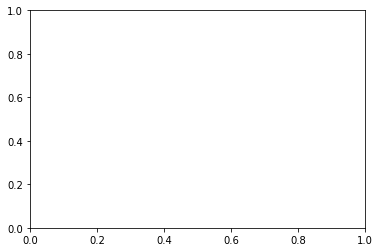

In [67]:
fig = plt.figure()  
X = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
Y = [130062,2181,45,6,4,2,1,0,0,1]
plt.bar(X,Y,0.4,color="green")  
plt.xlabel("X-axis")  
plt.ylabel("Y-axis")  
plt.title("bar chart")  

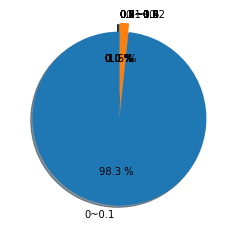

In [81]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
labels = '0~0.1', '0.1~0.2', '0.2~0.3', '0.3~0.4','0.4~0.5','0.5~0.6','0.5~0.6','0.7~0.8', '0.8~0.9', '0.9~1'
fracs = [130062,2181,45,6,4,2,1,0,0,1]
plt.axes(aspect=1)
explode = [0, 0.1, 0.1, 0.1,0.1, 0.1, 0.1,0.1, 0.1, 0.1] # 0.1 凸出这部分，
plt.axes(aspect=1)  # set this , Figure is round, otherwise it is an ellipse
#autopct ，show percet
plt.pie(x=fracs, labels=labels,autopct='%3.1f %%',explode=explode,
        shadow=True, labeldistance=1.1, startangle = 90,pctdistance = 0.6)

plt.show()